<a href="https://www.kaggle.com/code/sjagkoo7/ed-ai-dl-m7-inclass-classifying-emotion-using-cnn?scriptVersionId=197818008" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Classifying Emotion using CNN on Tensorflow 2.x

## Problem Statement

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

This study proposes the development of a system that can predict and recognize the classification of facial emotions using the Convolution Neural Network (CNN) algorithm and feature extraction.

![alt text](https://i.imgur.com/lGvw0Bq.png)

#### **Dataset Description**

- Total Images: The dataset consists of 35,887 examples.
- Two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image.
- Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

#### **Summary of  the Notebook**

- Install Tensorflow 2.x
- Import the required libraries - tensorflow
- Read the dataset - Understanding - Preprocessing
- Split the dataset to training and testing
- Create a Model
- Check accuracy - validation
-  Tune Parameters
- Accuracy - validation

# Model Classifying Emotion using CNN on Tensorflow 2.x

## Installing TensorFlow

In [1]:
! pip install tensorflow # install tensorflow library

In [2]:
# verify installation
import tensorflow as tf  #importing tensorflow
from tensorflow import keras #fatser imlementation tensorflow

#check tf.keras version
print(tf.__version__)

2.16.1


## Import the required libraries - tensorflow

In [3]:
#enable table format
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

#disable table format
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

import pandas as pd  # for reading the dataset
import numpy as np  # for mathematical operations

import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import matplotlib.image as mpimg # image processing

from sklearn.model_selection import train_test_split # splitting the dataset

from tensorflow.keras.utils import to_categorical # for one hot encoding

from tensorflow.keras.preprocessing import image # for image processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator # for data augmentation
# preprocessing : resize the image, generate more images from given images,zomm the images

from tensorflow.keras.models import Sequential # type of model for coding
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Flatten,Dense,Dropout ,BatchNormalization,GlobalMaxPooling2D #Dense:Fully Connected
# Conv2D() - Convolutional layer (to extract features from the images)
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping


## Preparing the Data

### Loading the Data

In [4]:
#Mount the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

#Load the dataset from Kaggle
# ! pip install -q opendatasets
# import opendatasets as od
# od.download('https://www.kaggle.com/datasets/deadskull7/fer2013')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fer2013/fer2013.csv


In [5]:
data = pd.read_csv('/kaggle/input/fer2013/fer2013.csv')
data.head(2)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


### <b> Visualize the  Data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


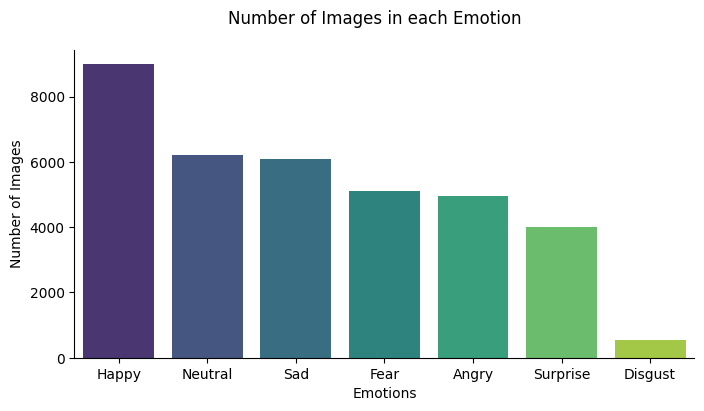

In [7]:
#Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotion_mapping = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

# We  have the emotion_mapping dictionary
emotion_counts = data.emotion.value_counts()

# Access emotion counts with corresponding names
emotion_name = [emotion_mapping[label] for label in emotion_counts.index]
emotion_count = [count for count in emotion_counts.values]

# Create a bar plot using Matplotlib & Seaborn
fig, ax = plt.subplots(1,1,figsize=(8,4))
#sns.barplot(x=data.emotion.value_counts().keys() ,y=data.emotion.value_counts().values,palette="viridis",ax=ax)
sns.barplot(x=emotion_name,y=emotion_count,palette="viridis",ax=ax)
plt.xlabel("Emotions")
plt.ylabel("Number of Images")
ax.spines['top'].set_visible(False) # it will remove the top boundry line
ax.spines['right'].set_visible(False) # it will remove the right boundry line
fig.suptitle("Number of Images in each Emotion")
plt.show()

### Shuffle the rows in dataset

The sample() function in pandas can be used to shuffle the data. Setting the frac parameter to 1 ensures that all rows are included in the shuffled dataset. It helps prevents Bias and improves Generalization

In [8]:
data = data.sample(frac=1)
data.head(2)

,emotion,pixels,Usage
23042,3,15 17 17 15 7 5 6 8 9 10 12 14 14 12 14 15 15 ...,Training
21111,0,95 73 53 43 35 42 50 67 134 183 188 183 186 18...,Training


### One Hot Encoding

Best for multi-class classification

In [9]:
classes = to_categorical(data[['emotion']], num_classes=7)
classes

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

### Data Preprocessing

In [10]:
#Changing image pixels to Numpy array
pixels = data["pixels"].astype(str).str.split(" ").tolist()
pixels = np.uint8(pixels)
pixels

array([[ 15,  17,  17, ...,  88,  83, 113],
       [ 95,  73,  53, ...,  51,  51,  51],
       [ 32,  34,  34, ..., 143, 135, 125],
       ...,
       [ 99, 104,  67, ..., 250, 251, 252],
       [124, 126, 126, ..., 120, 100, 101],
       [230, 231, 235, ...,  77, 135, 253]], dtype=uint8)

In [11]:
pixels.shape

(35887, 2304)

- 35887 - number of images
- 2304 -   48*48 - image dimension

In [12]:
# converting in float32 to use 32- bit precision
pixels = pixels.astype('float32')
#normalizing the input values
pixels /= 255
# reshaping the dataset
pixels = pixels.reshape((35887, 48, 48,1))  #defualt - 1: This signifies that each pixel is represented by a single value (likely grayscale, as color images typically have 3 channels for red, green, and blue).
pixels

array([[[[0.05882353],
         [0.06666667],
         [0.06666667],
         ...,
         [0.07843138],
         [0.08235294],
         [0.08235294]],

        [[0.05490196],
         [0.05882353],
         [0.0627451 ],
         ...,
         [0.08235294],
         [0.08235294],
         [0.08627451]],

        [[0.05882353],
         [0.05490196],
         [0.05882353],
         ...,
         [0.08235294],
         [0.09019608],
         [0.09411765]],

        ...,

        [[0.03529412],
         [0.03921569],
         [0.04313726],
         ...,
         [0.30980393],
         [0.28235295],
         [0.44313726]],

        [[0.03921569],
         [0.03921569],
         [0.04313726],
         ...,
         [0.33333334],
         [0.29411766],
         [0.31764707]],

        [[0.03921569],
         [0.03921569],
         [0.04313726],
         ...,
         [0.34509805],
         [0.3254902 ],
         [0.44313726]]],


       [[[0.37254903],
         [0.28627452],
         [0.20

### Train test validation split
Now, we have 35887 images with each containing 48x48 pixels. We will split the data into train,test and Validation data to feed and evaluate and validate our data with the ratio of 10%.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(pixels, classes, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)


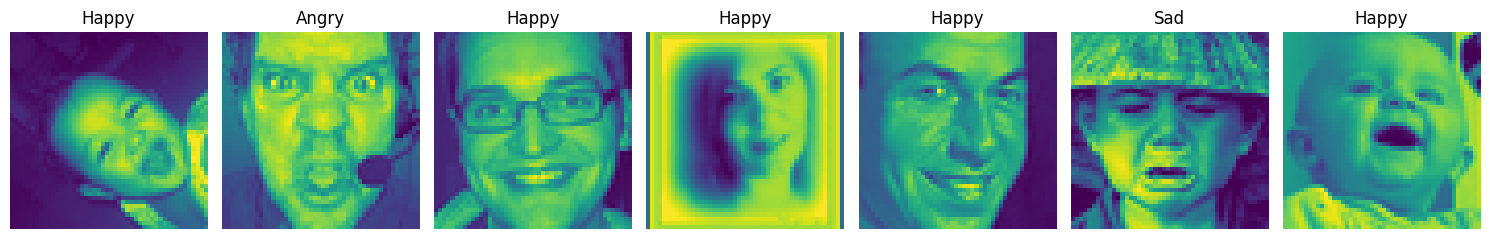

In [15]:
# visualizing the training input
plt.figure(figsize=(15,23))
for i in range(7):
  img = np.squeeze(X_train[i])
  plt.subplot(1,7,i+1)
  plt.imshow(img)
  index = np.argmax(y_train[i])
  plt.title(emotion_mapping[index])
  plt.axis('off') # turn off the axis numbering
plt.tight_layout()
plt.show()

### <b> Generate Images to train the model

1.   Rescale
2.   Shear_range
3.   Zoom_range
4.  Horizontal_flip

- This class allows to configure random transformations and normalization on the allocated image during training time
- Prevents overfitting and helps to generate a generalize model
- Never repeats the exact same images twice  to train our model

In [16]:
train_datagen=ImageDataGenerator( width_shift_range = 0.1, #shift the image width by 10%
                                 height_shift_range = 0.1, #shift the image height by 10%
                                 horizontal_flip = True, #flip the image horizontally
                                 zoom_range = 0.2) #zoom the images by 20%


valgen = ImageDataGenerator( width_shift_range = 0.1, #shift the image width by 10%
                               height_shift_range = 0.1, #shift the image height by 10%
                               horizontal_flip = True, #shift the image height by 10%
                               zoom_range = 0.2) #zoom the images by 20%


In [17]:
train_datagen.fit(X_train)
valgen.fit(X_val)

In [18]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)
validation_generator = valgen.flow(X_val, y_val, batch_size=64)

### **Visual Representation of ImageDataGenerator**

<function matplotlib.pyplot.show(close=None, block=None)>

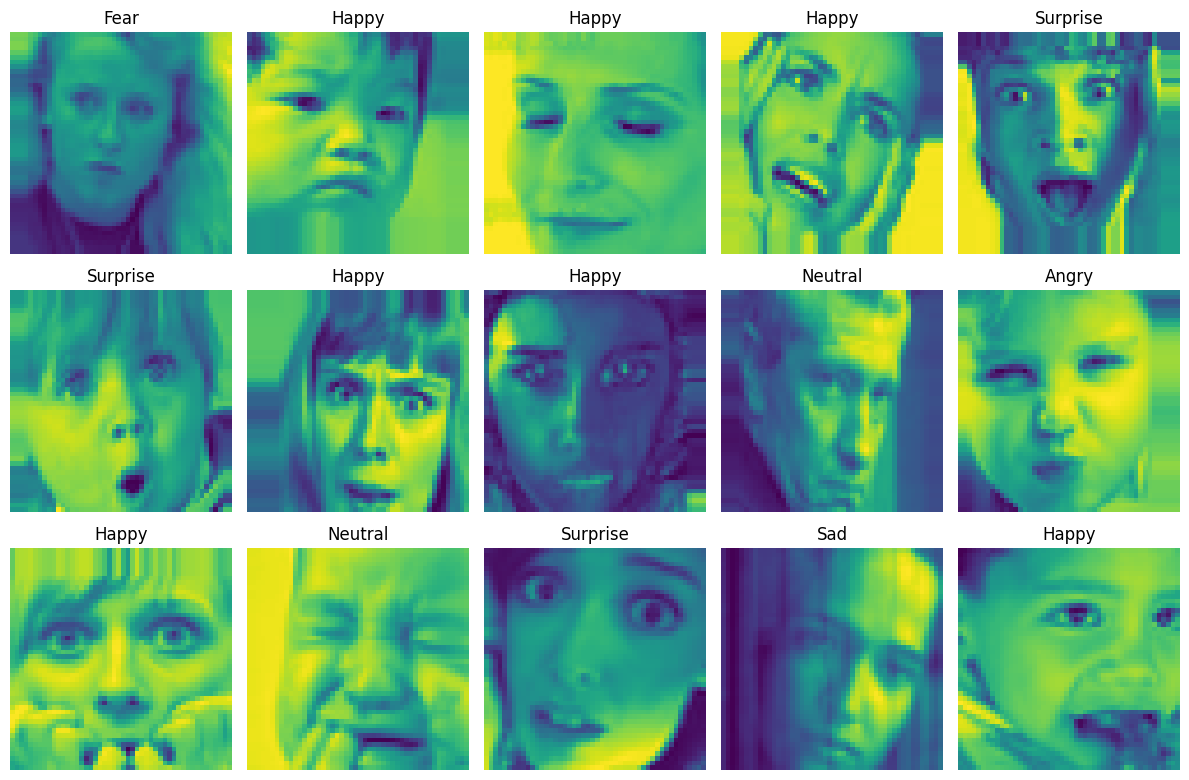

In [19]:
plt.figure(figsize=(12,8))
for i in range(0,15):
  plt.subplot(3,5,i+1)
  for X_batch , Y_batch in train_generator:
    images = X_batch[0]
    plt.imshow(images)
    index = np.argmax(Y_batch[i])
    plt.title(emotion_mapping[index])
    plt.axis('off') # turn off the axis numbering
    break
plt.tight_layout()
plt.show

## Designing the CNN Model

### <b> Build the  CNN model

<b>

1.   Conlutional Layer
2.   ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)

img source  : towardsdatascience.com

![alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

- Dropout: used to deactive some neurons randomly to prevent overfitting
- Early Stop: To prevent over fitting we will stop the learning after 5 epochs and val_loss value not decreased
- Learning Rate Reduction: We will reduce the learning rate when then accuracy not increase for 2 steps
- factor: factor by which the learning rate will be reduced. new_lr = lr * factor

In [20]:
# Model Building

model= Sequential() # seqential composition
# add a layer : Dense , Dropout , activation and cnn work better for images

# Input : layer -1
model.add(Conv2D(64,(5,5),input_shape=(48, 48,1),activation='relu'))
# Conv2D for images , Conv3D for video
# Convultional layers -  with 64 filter/feature of 3 height and 3 width and height and width will be always odd number.
# This class allows to create convoluional neural network to extract feature from images
# INPUT : 48x48x3
# CONV : 64 filters/feature ,3x3
# Output : 48x48x64
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #MaxPooling2D helps to reduce the size of the data
#7x7x3 _max pooling size _ output:4x4x3
#48x48x64_max pooling size_output:24x24x64
# it's divides size by 2 as it is MaxPooling 2D

#layer -2
model.add(Conv2D(128,(5,5),  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#layer -3
model.add(Conv2D(256,(5,5),  activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


#layer - 4
model.add(Flatten()) # converts multi dimenional array to 1D channel
model.add(Dense(128,activation = 'relu')) # 256 - number of output nodes in the hidden layer
model.add(BatchNormalization())
model.add(Dropout(0.25))

#Output - layer
model.add(Dense(7, activation='softmax'))
#Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
# Multi-Class Classification

#model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
#Compile
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

# 2 classes , binary_crossentropy , sigmoid activation is  used
# more than 2 , categorical_crossentropy , softmax is used
earlystop = EarlyStopping(patience=5)
callbacks = [earlystop]

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 44, 44, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 44, 44, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 18, 18, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 5, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,160,455 (4.43 MB)

 Trainable params: 1,159,303 (4.42 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [22]:
# train the model
training = model.fit(train_generator,epochs=30, batch_size=64, callbacks= callbacks,
                     validation_data=validation_generator)

#overfitting : when training accuracy is higher than val_accuracy[2%]
#underfitting : when val_accuracy is higher than training accuracy[2%]
#appropriate : abs(training accuracy-val_accuracy ) ~ 2%

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727026254.704863      80 service.cc:145] XLA service 0x7af0e00074a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727026254.704938      80 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727026254.704944      80 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  6/455 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.1573 - loss: 2.6753

I0000 00:00:1727026260.382938      80 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


455/455 ━━━━━━━━━━━━━━━━━━━━ 28s 43ms/step - accuracy: 0.2179 - loss: 2.2411 - val_accuracy: 0.2920 - val_loss: 1.8054
Epoch 2/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.3095 - loss: 1.8833 - val_accuracy: 0.3780 - val_loss: 1.6418
Epoch 3/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.3564 - loss: 1.7589 - val_accuracy: 0.4108 - val_loss: 1.5505
Epoch 4/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.3862 - loss: 1.6650 - val_accuracy: 0.4310 - val_loss: 1.4943
Epoch 5/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4214 - loss: 1.5676 - val_accuracy: 0.4511 - val_loss: 1.4372
Epoch 6/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4394 - loss: 1.5126 - val_accuracy: 0.4567 - val_loss: 1.4242
Epoch 7/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4629 - loss: 1.4457 - val_accuracy: 0.4768 - val_loss: 1.3845
Epoch 8/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4732 - loss: 1.4143 - val_accurac

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


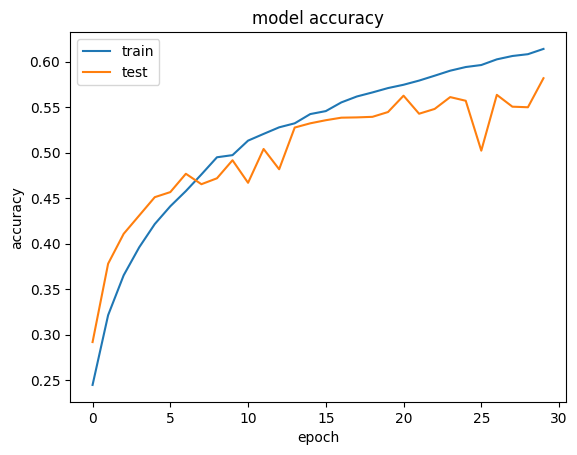

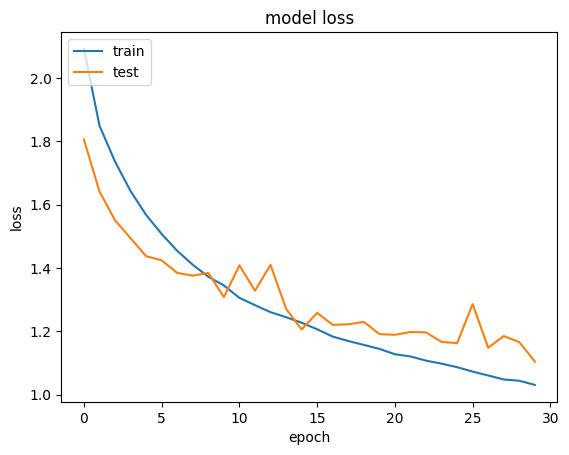

In [23]:
# accuracy visualization

import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


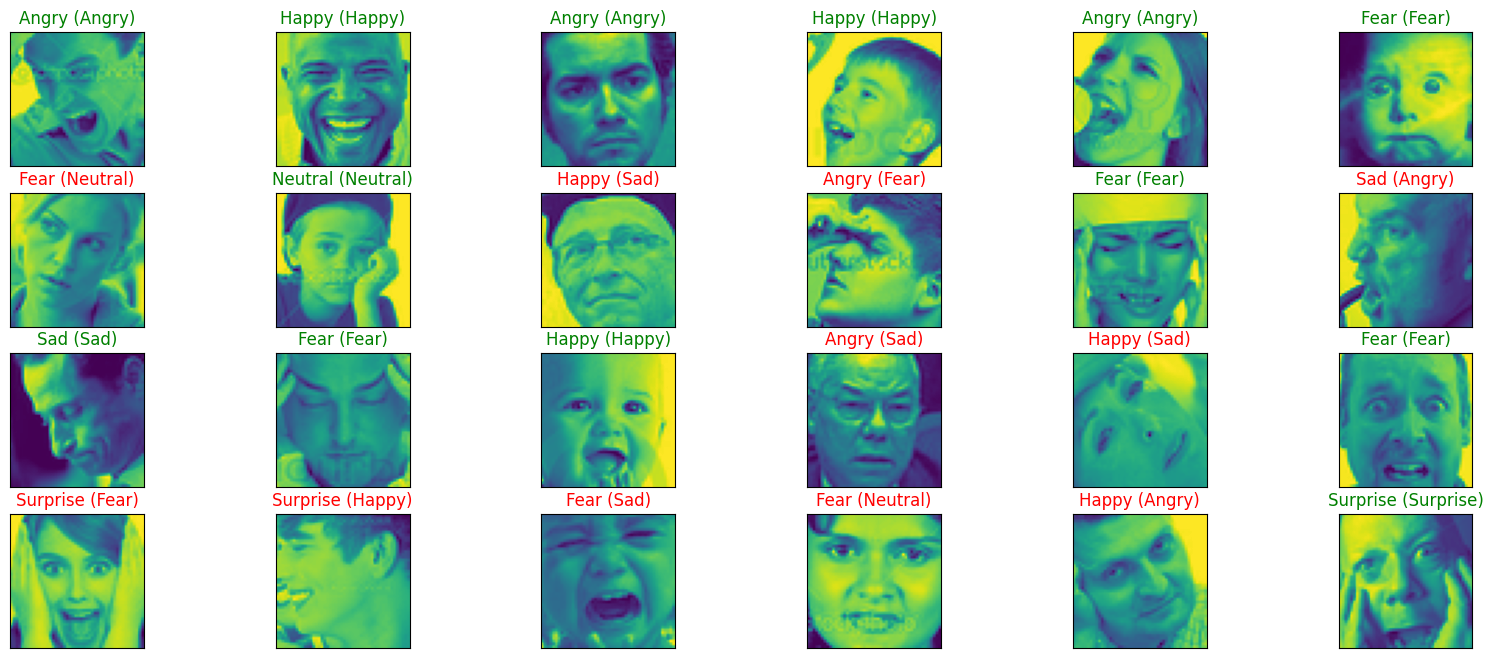

In [24]:
# prediction
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

#visulaization
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = emotion_mapping[(y_pred[index])]
    true_index = emotion_mapping[np.argmax(y_test,axis=1)[index]]

    ax.set_title("{} ({})".format((predict_index),
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))


# References
- https://www.kaggle.com/code/oykuer/emotion-detection-using-cnn